In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.style.use('fivethirtyeight')
plt.style.use('dark_background')
plt.style.use('seaborn-bright')

In [8]:
df_1 = pd.read_csv('data/Puncher_Run1_Puncher.csv')
df_2 = pd.read_csv('data/Puncher_Run2_Puncher.csv')
df_3 = pd.read_csv('data/Puncher_3_Puncher.csv')
df_4 = pd.read_csv('data/Puncher_4_Puncher.csv')

In [9]:
def get_reward_data(file_path, col1, col2):
    df = pd.read_csv(file_path)
    df = df.dropna(axis=0)
    return df[col1], df[col2]

def single_plot(x, y, xlabel, ylabel, color):
    fig, axs = plt.subplots(figsize=(12,10))
    axs.plot(df1_x, df1_y, color=color)
    axs.grid(False)
    #axs.legend(fontsize=20)
    axs.set_xlabel(xlabel)
    axs.set_ylabel(ylabel)
    axs.set_title(f"{ylabel} vs {xlabel} for Puncher")
    #plt.savefig('reward_2runs_trunc.png')
    plt.show()

Puncher_Run2 rewards(torque=10):

* Destroying target: 1

* Hitting target: 0.2

* Looking at target: (1/60) / s

* NOT looking at target (1/60) / s 

Puncher3 rewards(torque=20):

* Destroying target: 1

* Hitting target: 0.2

* __Looking at target: (2/60) / s__

* NOT looking at target (1/60) / s 

YAML File:

Puncher:
  trainer: ppo
  
  batch_size: 64
  
  beta: 0.001
  
  buffer_size: 12000
  
  epsilon: 0.2
  
  hidden_units: 128
  
  lambd: 0.99
  
  learning_rate: 0.0003
  
  learning_rate_schedule: linear
  
  max_steps: 5.0e6
  
  memory_size: 128
  
  normalize: true
  
  num_epoch: 3
  
  num_layers: 2
  
  time_horizon: 1000
  
  sequence_length: 64
  
  summary_freq: 12000
  
  use_recurrent: false
  
  vis_encode_type: simple
  
  reward_signals:
  
    extrinsic:
    
      strength: 1.0
      
      gamma: 0.99


In [6]:
df1_x, df1_y = get_reward_data('data/Puncher_Run2_Puncher.csv', 'Steps', 'Policy/Extrinsic Reward')
puncher_times = pd.read_csv('data/Puncher_2_Training_times.csv', header=None)

In [17]:
puncher_times.iloc[0].str.split('Time Elapsed: ')[0][1].split(' s ')[0]

'34.518'

In [27]:
puncher_times[0]

0        34.518
1        57.389
2        83.065
3       101.177
4       126.970
         ...   
411    9016.928
412    9037.358
413    9056.349
414    9078.513
415    9099.203
Name: 0, Length: 416, dtype: object

In [18]:
for i in range(puncher_times.shape[0]):
    puncher_times.iloc[i] = puncher_times.iloc[i].str.split('Time Elapsed: ')[0][1].split(' s ')[0]

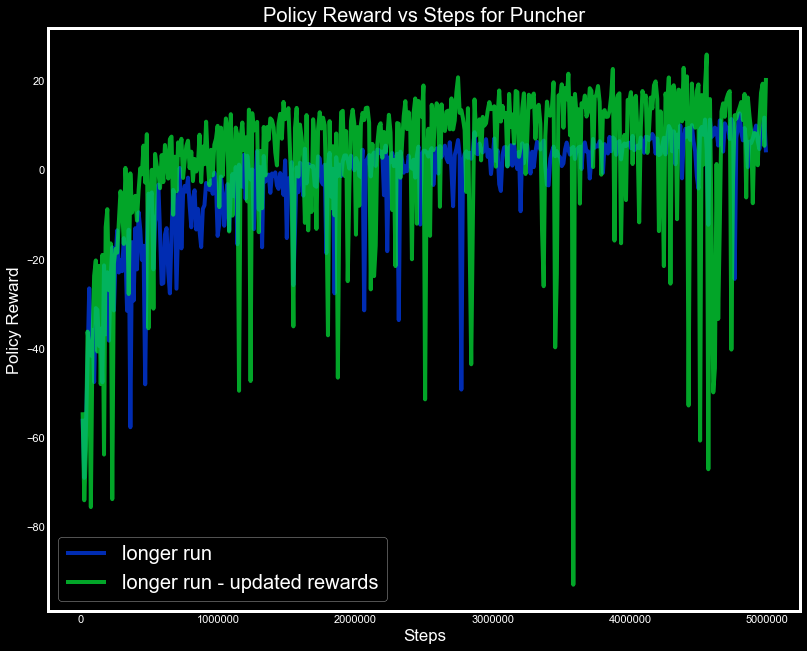

In [14]:
df1_x, df1_y = get_reward_data('data/Puncher_Run1_Puncher.csv', 'Steps', 'Policy/Extrinsic Reward')
df2_x, df2_y = get_reward_data('data/Puncher_Run2_Puncher.csv', 'Steps', 'Policy/Extrinsic Reward')
df3_x, df3_y = get_reward_data('data/Puncher_3_Puncher.csv', 'Steps', 'Policy/Extrinsic Reward')
df4_x, df4_y = get_reward_data('data/Puncher_4_Puncher.csv', 'Steps', 'Policy/Extrinsic Reward')

xlabel = 'Steps'
ylabel = 'Policy Reward'

fig, axs = plt.subplots(figsize=(12,10))
# axs.plot(df1_x, df1_y, label='initial short run', alpha=1.0)
axs.plot(df2_x, df2_y, label='longer run', alpha=0.7)
axs.plot(df3_x, df3_y, label='longer run - updated rewards', alpha=0.7)
# axs.plot(df4_x, df4_y, label='higher reward for looking', alpha=0.7)
axs.grid(False)
axs.legend(fontsize=20)
axs.set_xlabel(xlabel)
axs.set_ylabel(ylabel)
axs.set_title(f"{ylabel} vs {xlabel} for Puncher")
plt.savefig('reward_2runs_puncher.png')
plt.show()
# single_plot(df1_x, df1_y, 'Steps', 'Policy Reward', 'springgreen')

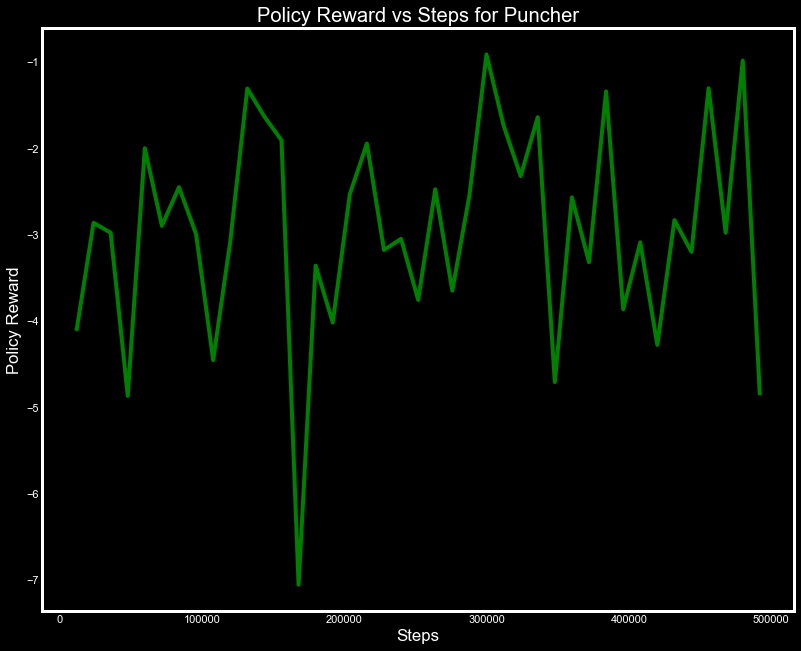

In [6]:
single_plot(df4_x, df4_y, xlabel, ylabel, "green")

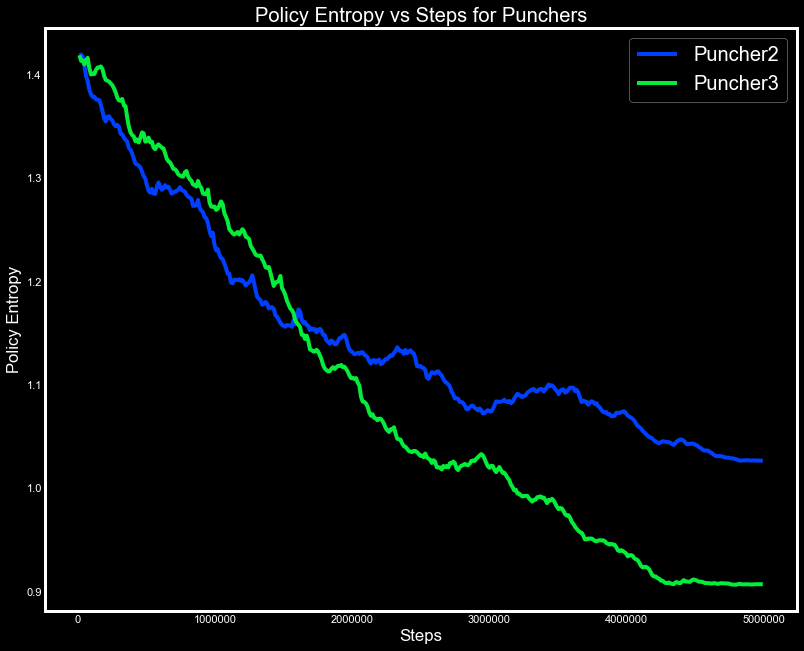

In [13]:
df1_x, df1_y = get_reward_data('data/Puncher_Run2_Puncher.csv', 'Steps', 'Policy/Entropy')
df2_x, df2_y = get_reward_data('data/Puncher_3_Puncher.csv', 'Steps', 'Policy/Entropy')

# single_plot(df1_x, df1_y, 'Steps', 'Policy Reward', 'springgreen')
fig, axs = plt.subplots(figsize=(12,10))
axs.plot(df1_x, df1_y, label='Puncher2')
axs.plot(df2_x, df2_y, label='Puncher3')
axs.grid(False)
axs.legend(fontsize=20)
axs.set_xlabel('Steps')
axs.set_ylabel('Policy Entropy')
axs.set_title('Policy Entropy vs Steps for Punchers')
plt.savefig('entropy_vs_steps_23.png')
plt.show()

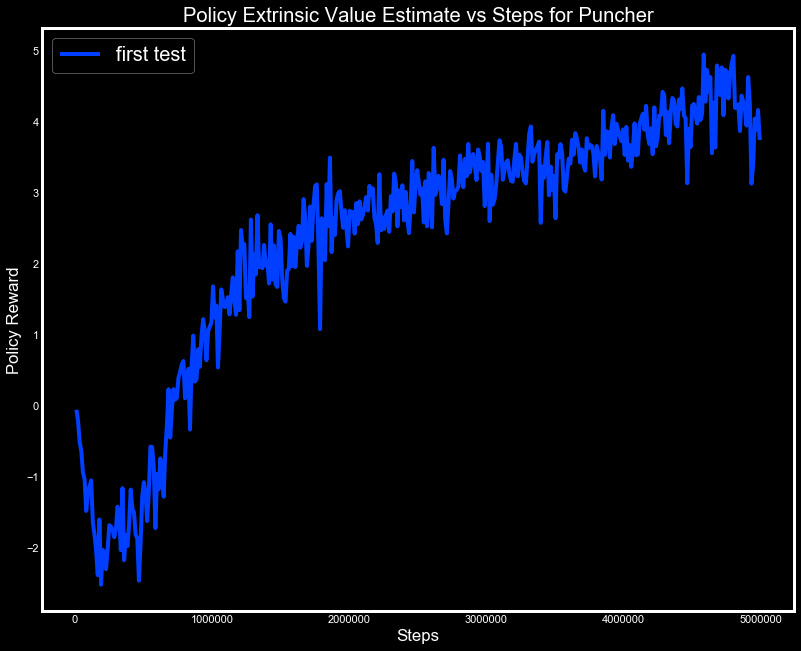

In [11]:
df1_x, df1_y = get_reward_data('data/Puncher_Run2_Puncher.csv', 'Steps', 'Policy/Extrinsic Value Estimate')
fig, axs = plt.subplots(figsize=(12,10))
axs.plot(df1_x, df1_y, label='first test')
axs.grid(False)
axs.legend(fontsize=20)
axs.set_xlabel('Steps')
axs.set_ylabel('Policy Reward')
axs.set_title('Policy Extrinsic Value Estimate vs Steps for Puncher')
#plt.savefig('reward_2runs_trunc.png')
plt.show()

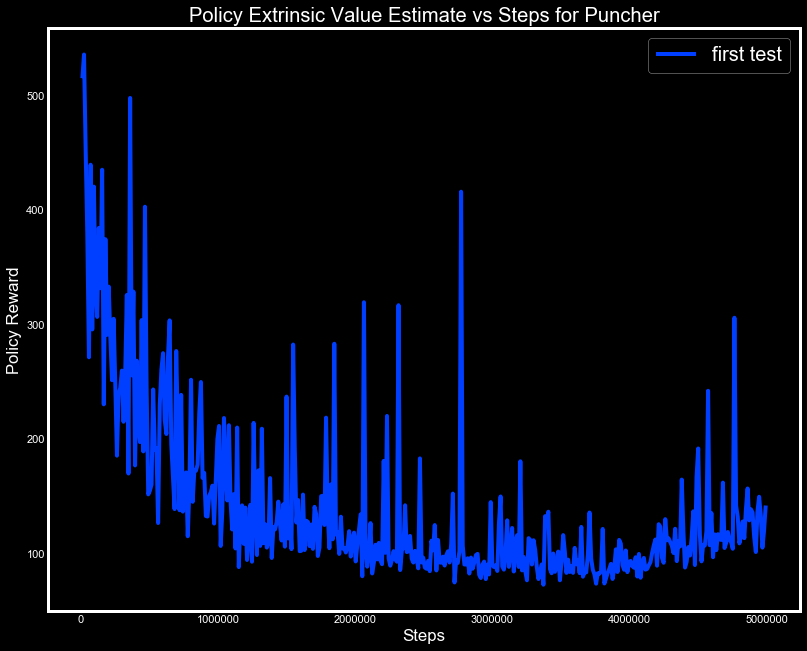

In [16]:
df1_x, df1_y = get_reward_data('data/Puncher_Run2_Puncher.csv', 'Steps', 'Environment/Episode Length')
fig, axs = plt.subplots(figsize=(12,10))
axs.plot(df1_x, df1_y, label='first test')
axs.grid(False)
axs.legend(fontsize=20)
axs.set_xlabel('Steps')
axs.set_ylabel('Policy Reward')
axs.set_title('Policy Extrinsic Value Estimate vs Steps for Puncher')
#plt.savefig('reward_2runs_trunc.png')
plt.show()